# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [19]:
# Load pickled data
import pickle
import os

# TODO: Fill this in based on where you saved the training and testing data

data_dir = 'traffic-signs-data'
training_file = os.path.join(data_dir,'train.p')
testing_file = os.path.join(data_dir,'test.p')
validation_file = os.path.join(data_dir,'valid.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_test, y_test = test['features'], test['labels']
x_valid, y_valid = valid['features'], valid['labels']

print(len(x_train))
print(len(x_test))
print(len(x_valid))

34799
12630
4410


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
   
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# TODO: Number of training examples
n_train = np.shape(x_train)[0]

# TODO: Number of testing examples.
n_test = np.shape(x_test)[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(x_train)[1:4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Class: 0


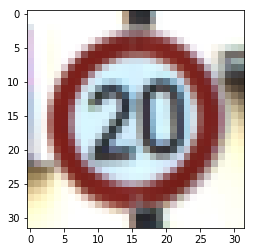

Class: 1


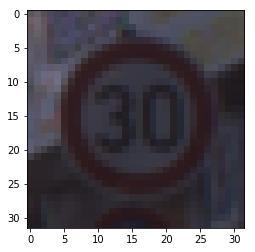

Class: 2


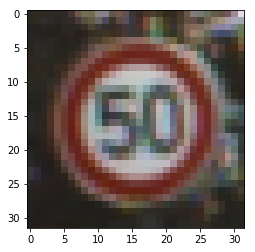

Class: 3


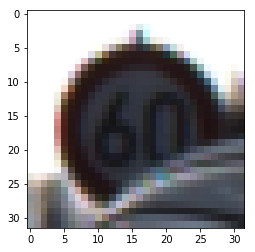

Class: 4


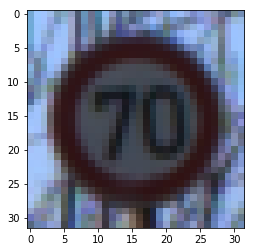

Class: 5


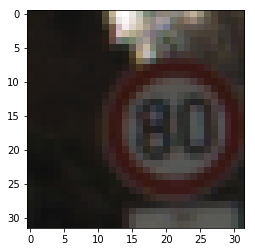

Class: 6


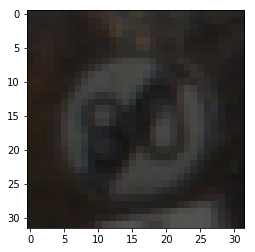

Class: 7


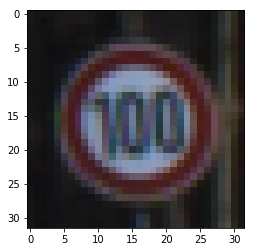

Class: 8


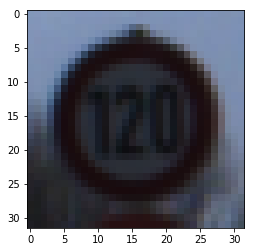

Class: 9


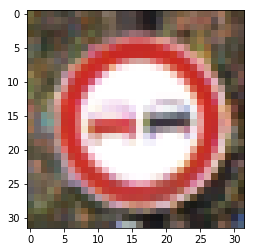

Class: 10


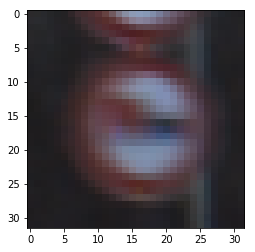

Class: 11


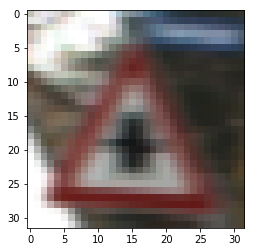

Class: 12


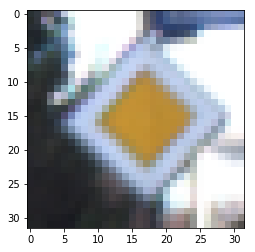

Class: 13


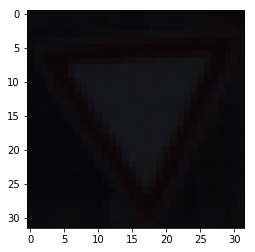

Class: 14


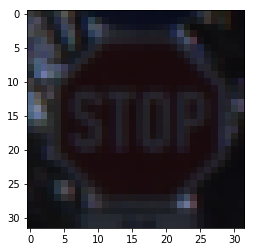

Class: 15


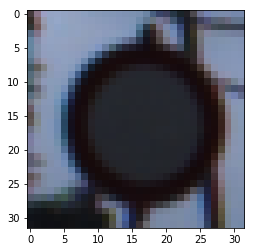

Class: 16


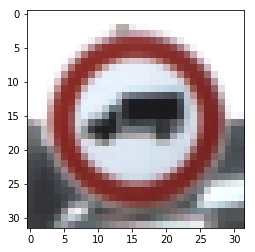

Class: 17


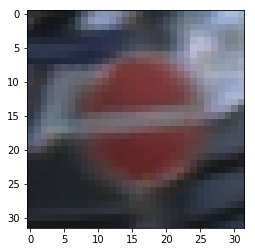

Class: 18


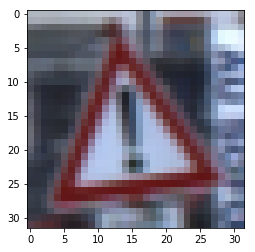

Class: 19


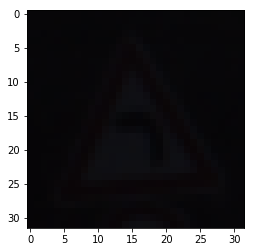

Class: 20


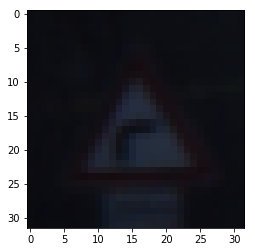

Class: 21


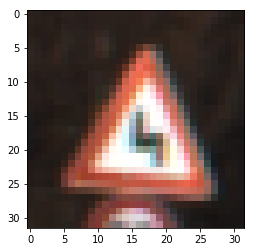

Class: 22


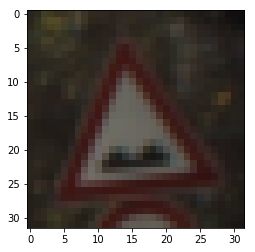

Class: 23


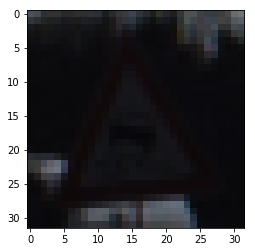

Class: 24


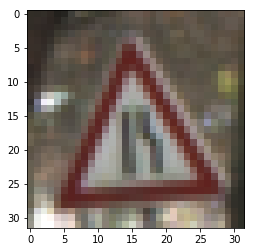

Class: 25


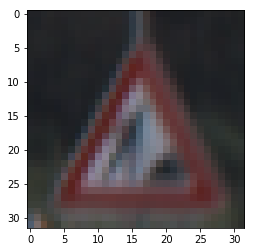

Class: 26


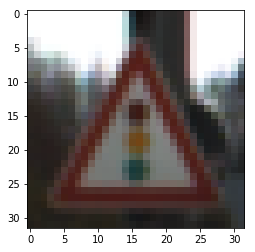

Class: 27


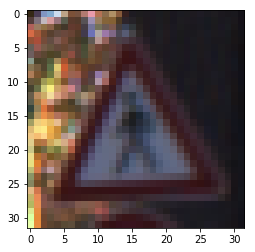

Class: 28


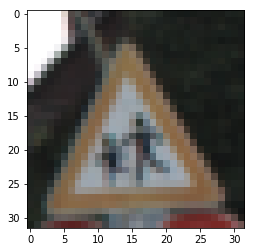

Class: 29


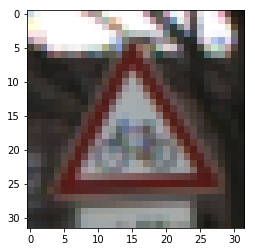

Class: 30


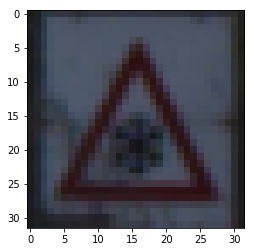

Class: 31


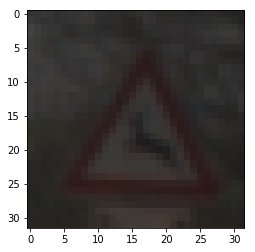

Class: 32


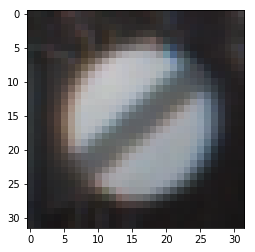

Class: 33


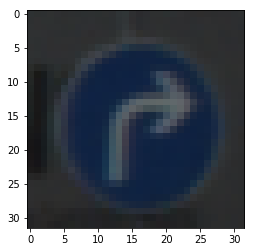

Class: 34


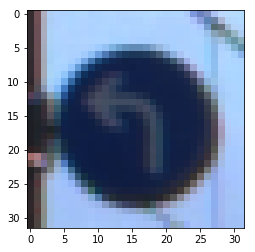

Class: 35


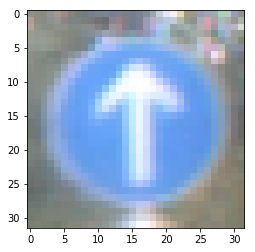

Class: 36


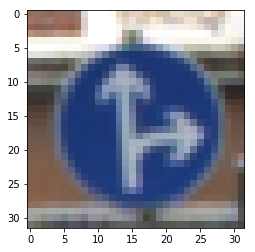

Class: 37


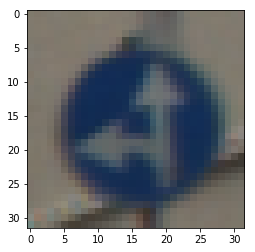

Class: 38


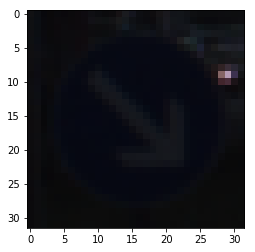

Class: 39


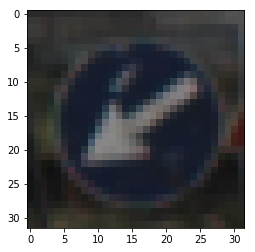

Class: 40


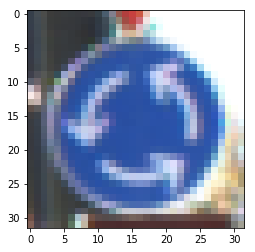

Class: 41


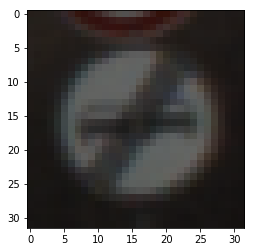

Class: 42


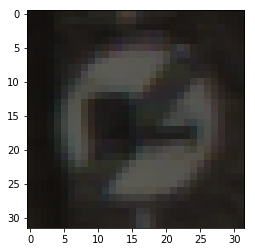

In [21]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed. 

for i in range(n_classes): #print signs by class
   
    print("Class:",i)
    plt.imshow(x_train[np.argwhere(y_train==i)[20][0]])
    plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

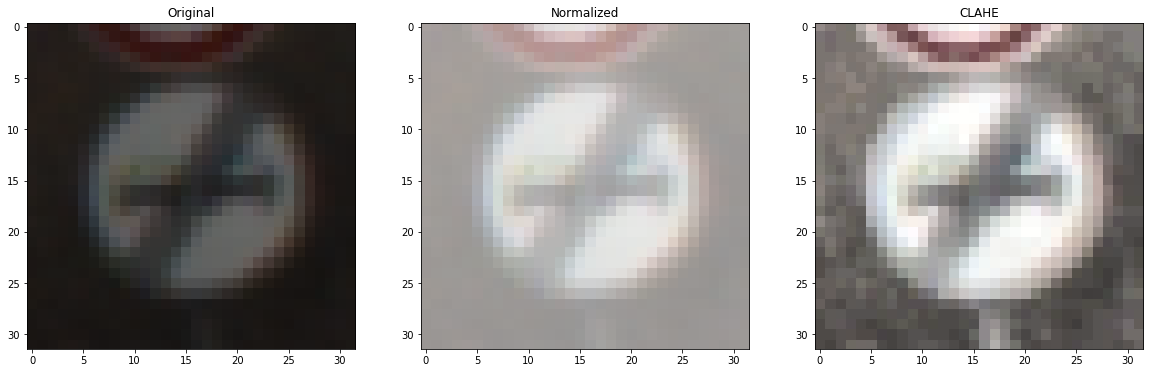

In [22]:
import cv2
import numpy as np

def normalized_img(img):
    a = -.5
    b = .5
    color_min = 0
    color_max = 255
    new_img = a + ( ( (img - color_min) * (b - a) )/(color_max - color_min))
    
    return new_img #Normalization

def c_img(img) :
    #----Convert to  lab colorspace
    lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    #----Splitting the LAB image to different channels
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(4,4))
    cl = clahe.apply(l)
     #----Merge the CLAHE enhanced L-channel with the a and b channel
    limg = cv2.merge((cl,a,b))
    #----Converting image from LAB Color model to RGB model
    new_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

    return new_img # Contrast Limited Adaptive Histogram Equalization

img = x_train[16]

fig, ax = plt.subplots(1,3, figsize=(20,6), sharex=True)
ax[0].imshow(img)
ax[1].imshow(normalized_img(img))
ax[2].imshow(c_img(img))

ax[0].set_title('Original')
ax[1].set_title('Normalized')
ax[2].set_title('CLAHE')

In [23]:
# Split the data into training/validation/testing 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tqdm import tqdm

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

def normalized_img(img):
    a = -.5
    b = .5
    color_min = 0
    color_max = 255
    new_img = a + ( ( (img - color_min) * (b - a) )/(color_max - color_min))
    
    return new_img #Normalization



#def c_img(img) :
    #----Convert to  lab colorspace
    #lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    #----Splitting the LAB image to different channels
    #l, a, b = cv2.split(lab)
    #clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(4,4))
    #cl = clahe.apply(l)
     #----Merge the CLAHE enhanced L-channel with the a and b channel
    #limg = cv2.merge((cl,a,b))
    #----Converting image from LAB Color model to RGB model
    #new_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

    #return new_img # Contrast Limited Adaptive Histogram Equalization (84.0% accuracy)

print('Preparing training data...')
x_train, y_train = shuffle(x_train, y_train)
images_pbar = tqdm(x_train, unit='images')
x_train = np.zeros(x_train.shape)
for i,img in enumerate(images_pbar) : 
    x_train[i] = normalized_img(img) 
print('Done')

print('Preparing validation data...')
x_valid, y_valid = shuffle(x_valid, y_valid)
images_pbar = tqdm(x_valid, unit='images')
x_valid = np.zeros(x_valid.shape)
for i,img in enumerate(images_pbar) : 
    x_valid[i] = normalized_img(img) 
print('Done')

print('Preparing testing data...')
x_test, y_test = shuffle(x_test, y_test)
images_pbar = tqdm(x_test, unit='images')
x_test = np.zeros(x_test.shape)
for i,img in enumerate(images_pbar) : 
    x_test[i] = normalized_img(img) 
print('Done')

Preparing training data...


100%|█████████████████████████████████████████████████████████████████| 27839/27839 [00:00<00:00, 41233.66images/s]


Done
Preparing validation data...


100%|███████████████████████████████████████████████████████████████████| 6960/6960 [00:00<00:00, 41043.16images/s]


Done
Preparing testing data...


100%|█████████████████████████████████████████████████████████████████| 12630/12630 [00:00<00:00, 43182.41images/s]


Done


### Model Architecture

In [24]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Based on 'Deep Neural Network/Deep Neural Network in TensorFlow' lesson

import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Parameters
rate = 0.001
EPOCHS = 50 
BATCH_SIZE = 128  # Decrease batch size if you don't have enough memory

def LeNet(x,keep_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x32. Output = 800.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 800. Output = 120.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(800, 120), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(120))
    fc2   = tf.matmul(fc0, fc2_W) + fc2_b
    
    # Activation and dropout.
    fc2    = tf.nn.relu(fc2)
    fc2  = tf.nn.dropout(fc2, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(84))
    fc3    = tf.matmul(fc2, fc3_W) + fc3_b
    
    # Activation and dropout
    fc3    = tf.nn.relu(fc3)
    fc3    = tf.nn.dropout(fc3, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes (43).
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    return logits

# tf Graph input
x = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.int32, [None])
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Define loss and optimizer
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# Initializing the variables
def evaluate(x_train, y_train):
    num_examples = len(x_train)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = x_train[offset:offset+BATCH_SIZE], y_train[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Launch the session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        x_train, y_train = shuffle(x_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

        validation_accuracy = evaluate(x_valid, y_valid)
        if i%10 == 0:
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
    save_file = 'model\model.ckpt'
    saver.save(sess, save_file)
    print("Model saved")

    

Training...

EPOCH 1 ...
Validation Accuracy = 0.612

EPOCH 11 ...
Validation Accuracy = 0.984

EPOCH 21 ...
Validation Accuracy = 0.992

EPOCH 31 ...
Validation Accuracy = 0.992

EPOCH 41 ...
Validation Accuracy = 0.993

Model saved


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [25]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# test model 


with tf.Session() as sess:
    saver.restore(sess, save_file)

    test_accuracy = evaluate(x_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.952


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [26]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# Read signnames.csv file
import pandas as pd
sign_names = pd.read_csv('signnames.csv')
sign_names.head(43)

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


general_caution.jpg
right_of_way_at_the_next_intersection.jpg
road_work.jpg
speed_limit_30.jpg
wild_animals_crossing.jpg


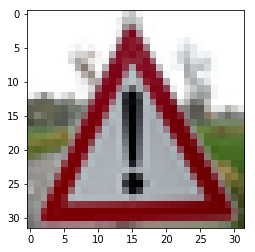

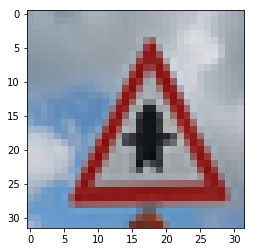

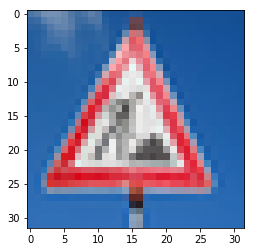

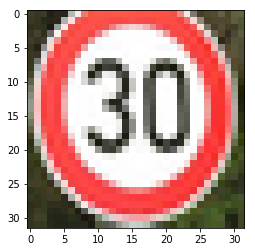

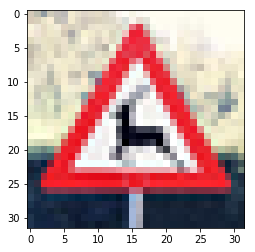

In [40]:
from PIL import Image


im_new_list = []

for filename in os.listdir('int_img'):
    print(filename)
    im = Image.open('int_img/' + filename)
    im_new = im.resize((32, 32), 1)
    plt.figure(figsize=(4,4))
    plt.imshow(im_new)
    #print(im_new.shape)
    im_new_list.append(im_new)

### Predict the Sign Type for Each Image

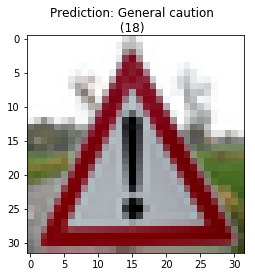

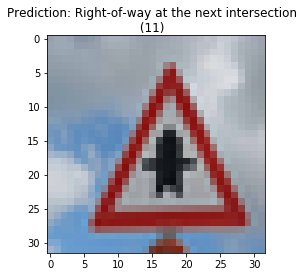

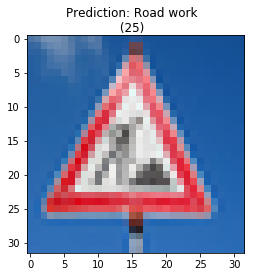

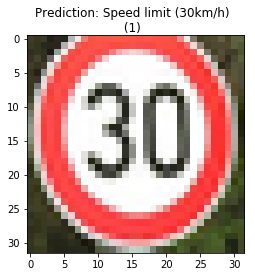

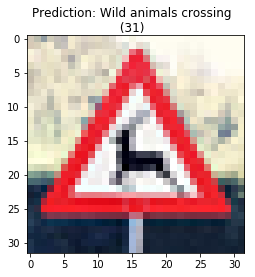

In [41]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.


import csv
dict_signs = {}
with open('signnames.csv', 'r') as csvfile:
    lines = csvfile.readlines()
    n_classes = len(lines) - 1 
    count = 0 
    for row in lines:
        if count > 0: 
            dict_signs[count - 1] = row.split(',')[1]
        count += 1

logits_list = []

for img in im_new_list:
    im_new = np.asarray(img)
    im_new = im_new[np.newaxis, ...]
    im_new = normalized_img(im_new)   
    with tf.Session() as sess:
        saver.restore(sess, save_file)
        logits_new = sess.run(logits, feed_dict = {x: im_new, keep_prob: 1.0})
        logits_list.append(logits_new)
        prediction = np.argmax(logits_new)
        #print predictions
        plt.figure(figsize=(4,4))
        plt.suptitle('Prediction: '+str(dict_signs[prediction]) + " (" + str(prediction)+ ") \n")
        plt.imshow(img)

### Analyze Performance

In [29]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images

#Prediction accuracy is 5/5 = 100% accurracy

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [38]:
logits_soft = tf.placeholder(tf.float32, (n_classes))
probabilities = tf.nn.softmax(logits_soft, name=None)

with tf.Session() as sess:
    for logits_i in logits_list:
        logits_i = np.squeeze(logits_i)
        prob = sess.run(probabilities, feed_dict = {logits_soft: logits_i})
        #print(prob)
        top5 = sess.run(tf.nn.top_k(tf.constant(prob), k=5))
        print("Top five softmax probabilities: " + str(top5))

Top five softmax probabilities: TopKV2(values=array([  1.00000000e+00,   1.85286594e-15,   6.75087031e-23,
         3.47386219e-28,   4.04893029e-30], dtype=float32), indices=array([18, 26, 27, 15, 20]))
Top five softmax probabilities: TopKV2(values=array([  1.00000000e+00,   4.20784496e-15,   3.76619735e-21,
         1.66650893e-22,   7.04057853e-23], dtype=float32), indices=array([11, 27, 21, 12, 30]))
Top five softmax probabilities: TopKV2(values=array([  1.00000000e+00,   1.21138897e-17,   9.72119923e-19,
         1.09800585e-20,   6.17369764e-21], dtype=float32), indices=array([25, 29, 30, 20, 14]))
Top five softmax probabilities: TopKV2(values=array([  9.75426137e-01,   2.38493197e-02,   5.76461840e-04,
         1.47168103e-04,   5.44512147e-07], dtype=float32), indices=array([ 1,  0,  4, 40, 37]))
Top five softmax probabilities: TopKV2(values=array([  1.00000000e+00,   1.28994818e-12,   3.43985162e-14,
         5.97621767e-16,   1.14018460e-17], dtype=float32), indices=array([31